# Линейная регрессия

### Признаки (Features) - это параметры обьекта:
- У квартиры(площадь, количество комнат и тд)
- У рекламы(разделение на тв, интернет и тд)


### Модель (Model): в sklearn каждый класс это каждая отдельная модель 
- Алгоритм или математическая структура, которая используется для анализа данных и прогнозирования результатов. 
- Например, линейная регрессия или нейронная сеть.

Первоначальные данные разбиваем на:
- X_train. Обучающая выборка (Training Data): Набор данных, который используется для обучения модели.
- Y_train. (Labels): Целевые значения, которые модель пытается предсказать.
- X_test. 
- Y_test

Кросс-валидация (Cross-Validation): Метод оценки производительности модели, который разделяет данные на несколько частей для обучения и тестирования.

- Большое смещение(bias) - недообучение (uderfitting)
- Большая дисперсия (variance) - переобучение (overfitting)
- Оба случая плохие модели


полимиальная регрессия это функция описывающая график где x будет в степени 2,3,...

когда мы хотим выбрать сложность модели, а также хотим оценить работу модели, то нам нужно изучать ошибки модели как на обучающем, так и на тестовом наборах данных.

Для полиноминальной регрессии это степень полинома, но другие алгоритмы могут иметь свои гиперпарамтры, определяющие сложность модели.

1. Создать различные степени полинома
2. Разбить данные на обучающий и тестовый наборы данных
3. Обучить модель. 
4. Сохранить метрики RMSE для обучающего и тестового набора данных
5. Нарисовать график с результатами - ошибка по степеням полинома

np.polyfit(x,y,1) - определяет чему равен b и k в
- y = kx + b, работает только с одномерным массивом

estimator - это термин, который обозначает модель машинного обучения

In [ ]:
from sklearn.model_selection import train_test_split
# разбиваем данные на обучающую выборку и тестовую
# разбиваем на признаки(x) и целевые значения(y)
# test_size=0.3 - определяем сколько процентов выделяем на тестирование модели(в данном случае 30%)
# random_state=101 - перемешиваем данные, чтобы модель обучалась на разных данных. и давала точнее результат
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# импортируем класс модели(каждый класс это разновидность модели)
from sklearn.linear_model import LinearRegression

# создаем ПУСТУЮ модель
model = LinearRegression() 
# обучаем ее на наших данных(сюда нужно вставлять только обучающую выборку)
model.fit(X_train,y_train)

# Мы передаём только тестовые данные
# Теперь мы можем сравнить предсказанные значения с известными нам истинными значениями y
# Модель делает предсказания - значения y с крышкой
test_predictions = model.predict(X_test)

#импортируем метрики
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
import pandas as pd
#вычисляем ошибки
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

## Повторное обучение модели на полных данных
# Если мы довольны работой модели на тестовых данных, то прежде чем передавать модель в эксплуатацию, 
# мы можем выполнить обучение модели на всех данных. 
# (Если же мы не довольны работой модели на тестовых данных, 
# то мы можем поменять значения параметров или вообще выбрать другую модель - позже мы обсудим это более подробно).

final_model = LinearRegression()
final_model.fit(X,y)

# узнать коэфициенты
final_model.coef_
pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])

# сохранение модели
from joblib import dump, load
dump(final_model, 'sales_model.joblib') 

# загрузка модели
loaded_model = load('sales_model.joblib')
loaded_model.predict(campaign)

Для регрессионных задач наиболее часто используются следующие три метрики:

**Средняя абсолютная ошибка - Mean Absolute Error** (MAE) - усредняет абсолютные значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Среднеквадратическая ошибка - Mean Squared Error** (MSE) - усредняет квадраты ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Среднеквадратическое отклонение - Root Mean Squared Error** (RMSE) - квадратный корень от среднеквадратической ошибки:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Сравнение метрик:

- **MAE** проще всего понять - это просто средняя ошибка.
- **MSE** более популярнее MAE, потому что MSE больше "наказывает" большие ошибки, и обычно это более полезно в прикладных задачах.
- **RMSE** даже ещё более популярна, чем MSE, потому что RMSE измеряется в тех же единицах, что и "y".

Все эти метрики являются **функциями потери (loss functions)**, потому что мы стремимся уменьшить их.

чтобы оценить правильное построение функции, нужно оценить это на трех графиках:
1. распределение должно быть нормальным(стремится к нормальному)
2. на графике точки не должны вырисовываться в виде линии(то есть остатки должны быть нормально распределены)

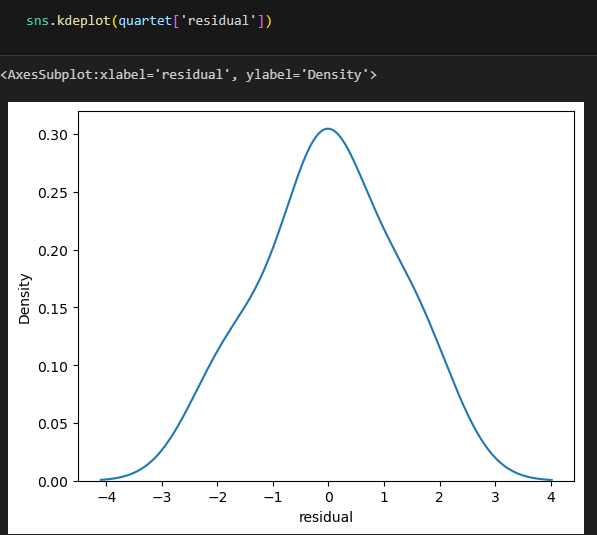
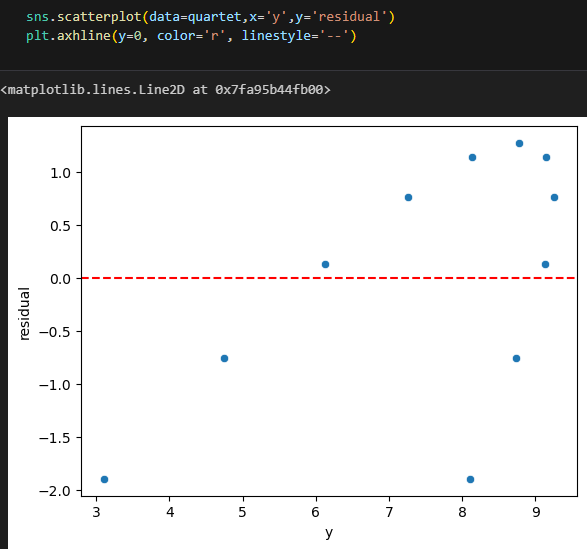

In [ ]:
import scipy as sp
# Создаём объект figure и оси для рисования графика
fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probplot возвращает значения, которые можно использовать при необходимости
# мы хотим просто нарисовать график, поэтому присваиваем эти значения переменной _
_ = sp.stats.probplot(test_res,plot=ax)

Если на графике точки лежат очень близко к линии, то это хорошо

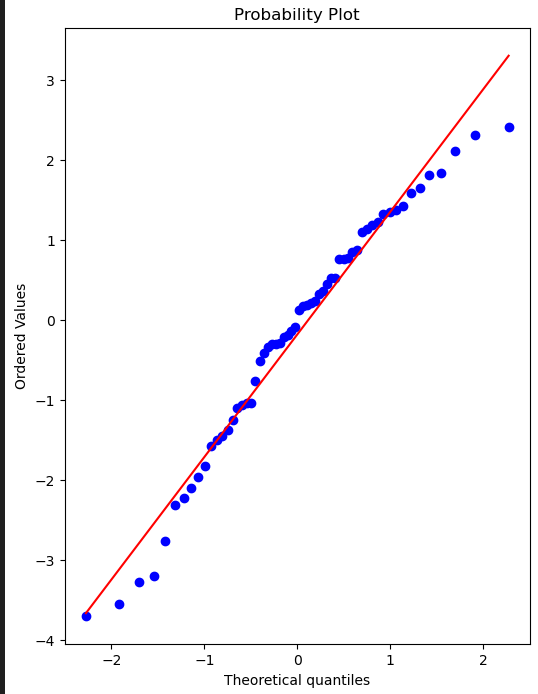

## Полиномиальная регрессия

- на входе мы имеем два измерения в виде [a, b], то полином второй степени имеет следующие признаки: [1, a, b, a^2, ab, b^2]. 
- использование полинома нужно для более точной модели, и повышая уровень(степень) полинома мы делаем точнее модель, до тех пор, пока это не приведет к ошибкам.

Мы перейдём от уравнения в следующей форме (здесь показан случай, когда у нас только один признак x):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

и добавим дополнительные признаки на основе исходного признака x для полинома некоторой степени *d*.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# degree это степень которую мы хотим выбрать
# include_bias означает должен ли в результирующей матрице полиномиальных признаков включаться "смещение" (bias) или константный член.(то есть единицу(1))
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

# Метод Converter "обучается" на данных, в данном случае, на основе всех колонок X
# Затем этот метод выполняет трансформацию и выдаёт на выходе новые полиномиальные данные
# например было три(tv,radio,newspaper) а стало 9 по формуле выше
poly_features = polynomial_converter.fit_transform(X)

# Разбиение на обучающий и тестовый наборы данных - Train | Test Split

from sklearn.model_selection import train_test_split
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# создаем экземпляр на полименеальных данных
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
# или сразу так:
final_model.fit(final_poly_converter.fit_transform(X),y)

# делаем шаги так же как и в обычной модели
    # обучаем на выделенных данных(train)
    # предсказываем на тестовых данных
    # смотрим ошибки(MAE,MSE,RMSE)

Включение константы:

1. Линейные модели: Включение константы полезно при работе с линейными моделями, такими как линейная регрессия. Это позволяет модели учитывать смещение или постоянный член, который может влиять на значение целевой переменной независимо от значений других признаков. Без константы линейная модель будет стремиться проходить через начало координат, что может быть неадекватным для многих данных.

2. Интерпретация модели: Константный член делает модель более интерпретируемой. Он представляет собой среднее значение целевой переменной (или другую подходящую константу), когда все признаки равны нулю или отсутствуют. Это может быть полезно для объяснения вклада каждого признака в прогнозы модели.

3. Обобщение: Включение константы делает модель более обобщенной. Она будет способна обучаться на данных, в которых признаки могут иметь нулевые значения или быть отсутствующими, и при этом делать разумные прогнозы.

4. Предотвращение переобучения: Включение константы может помочь предотвратить переобучение модели, особенно если данных ограничено и признаков много. Константный член действует как регуляризатор, что может сделать модель более устойчивой.

Давайте с помощью цикла for сделаем следующее:

1. Создадим полиномиальные данные некоторой степени для данных X
2. Разобъём полиномиальные данные для обучающий и тестовый наборы данных
3. Выполним обучение модели на обучающем наборе данных
4. Посчитаем метрики на обучающем *и* тестовом наборе данных
5. Нанесём эти данные на график, чтобы увидеть момент переобучения модели

In [ ]:
# Ошибка на обучающем наборе для той или иной степени полинома
train_rmse_errors = []
# Ошибка на тестовом наборе для той или иной степени полинома
test_rmse_errors = []

for d in range(1,10):
    
    # Создаём полиномиальные данные для степени "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # Разбиваем эти новые полиномиальные данные на обучающий и тестовый наборы данных
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # Обучаем модель на этом новом наборе полиномиальных данных
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # Выполняем предсказание и на обучающем, и на тестовом наборе данных
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Вычисляем ошибки
    
    # Ошибки на обучающем наборе данных
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Ошибки на тестовом наборе данных
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Добавляем ошибки в список для последующего нанесения на график
       
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

Сравниваем на разных ошибках(заметный рост ошибки начинается с 4 степени у каждого графика)

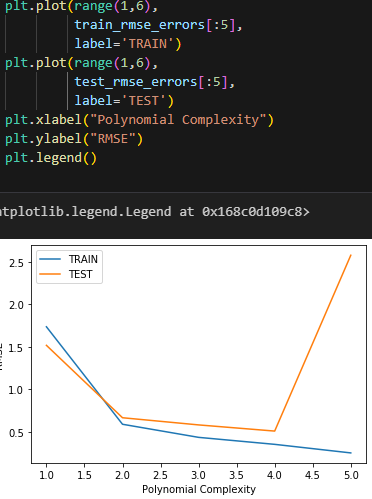
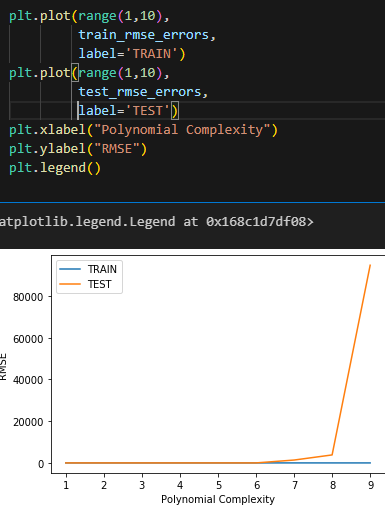
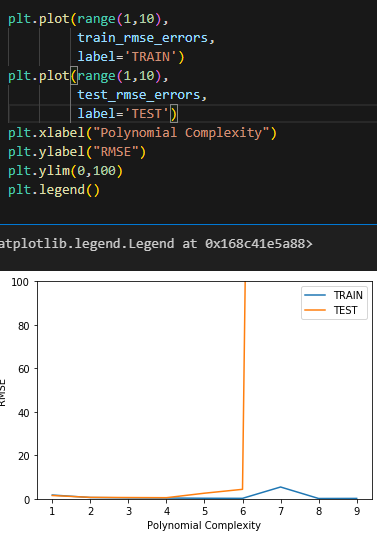

In [ ]:
# чтобы развернуть модель и использовать ее например:
# 149k на рекламу на ТВ, 22k на рекламу по радио и 12k на рекламу в газетах. 
# Сколько единиц товара мы ожидаем продать в результате такой рекламы?

loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

# показывает полином
campaign = [[149,22,12]]
campaign_poly = loaded_poly.transform(campaign) 

# получаем целевое значение(y) - 14, то есть продадим примерно 14 единиц товара с помощью рекламы
final_model.predict(campaign_poly)

Регуляризация - это механихм который помогает решить несколько общих проблем моделей, применяя:
- Минимизацию сложности модели
- Штрафы на функцию потерь
- Уменьшая переобученность модели (добавляя больше смещения, чтобы уменьшить дисперсию)

кратко:
- требует добавления смещения (bias)
- Требует поиска оптимального значения гиперпараметра для штрафа

- L1 - регуляризация - регрессия LASSO
- L2 - регуляризация - регрессия RIDGE
- Комбинация L1 и L2 - Elastic Net

L1 - регуляризация добавляет штраф, равный абсолютному значени величин 
   - Ограничивает размер коэффициентов
   - Может создавать разреженные модели, в которых некоторые коэффициенты становятся нулями

L2 - регуляризация добавляет штраф, равный квадрату величин коэффициентов
   - Все коэффициенты уменьша.тся на один порядок
   - Вовсе не обязательно обнулять коэффициенты

Elastic Net комбинирует L1 и L2, определяя соотношение между ними с помощью параметра alpha

## Масштабирование признаков(feature scalling)
- Полезно для процессов машинного обучения в частности(KNN), алгоритмы измеряющие расстояние между точек
- Чтобы алгоритмы хорошо работали, все признаки должны быть приведены к Единому Масштабу
- Улучшает сходимость итераций для алгоритмов, которые зависят м. признаков
- Если признаки имеют разных масштаб, то одни веса(weights) могут обновляться быстрее других
    - например градиентный спуск
    - то есть если имеют разный масштаб, то обновляться будут с разной скоростью
- некоторые не зависят от масштабирование(алгоритмы на основе классификации и регрессии)
- позволяет сравнивать признаки за счет сведения к одной шкале

Подводные камни:
- Новые данные должны быть смаштабированы перед тем, как добавлять их в модель
- Влияет на интепретацию коэффициентов - легче сравнивать коэффициенты между собой, но сложнее масштабироваться обратно на исходные шкалы.

Преимущества:
- Может заметно повысить производительность и улучшить результат
- Для некоторых моделей это просто необходимо
- Серьезных минусов практически нет

Два способа масштабирования:
- Стандартизация(z-score нормализация)
    - Данные должны получить среднее значние 0 и среднеквадратическое отклонение = 1
    - x(changed) = (X - среднее значение) / сред-квадрат. отклонение
- Нормализация
    - Данные должны оказаться в диапазоне от 0 до 1
    - x(changed) = (X - Xmin) / (Xmax - Xmin)

- Метод .fit() вычисляет метрики - мин,макс,среднее,дисперсия и тд(не масштабирует)
    - вызываем только для обучающих данных
    - вычисление стат. инфо. должно выполняться только на обучающих данных
    - не нужно в модель добавлять какие-то знания которые соедржатся в тестовых данных
    - если использовать все данные для вычесления стат. то произойдет утечка данных
- Метод .transform() масштабирует данные и возвращает новую версию данных
    - после разбивки и применения fit() для статистики можно использовать метод .transform() для любых данных

> В общем случае целевую переменную масштабировать не нужно.
Нормальзуя переменную, мы меняем определение целевой переменной. она будет отличаться от того, что мы пытаемся предсказать


Кросс-валидация - это набор более продивнутых методов для разбиения данных на обучающий и тестовый наборы
- Когда мы делаем простое разбиение, то теряем возможность отлаживать гиперпараметры модели **НА ВСЕМ** обьеме данных
- Можно ли обучить модель на всех данных и одновременно проверить на всех данных? да, это делает кросс-валидация
- Кросс валидация разбивает все данные на k частей и проводит итерацию для обучения модели k-части.
- Минус в том что увеличивает обучение на k раз. для больших моделей это критический момент.
- Есть теория при настройки гиперпараметров и повторном обучении, есть вероятность утечнки данных, для этого мы можем отложить часть данных('hold out' test-set). после этого не редактируем модель
- Во многих методах регуляризации есть параметры для настройки с помощью методов кросс-валидации

train validation hold out split

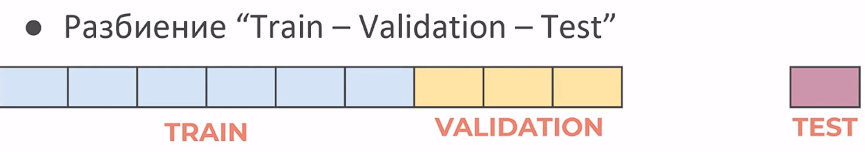

нужно учитывать:
- раннее выпоплененные работы
- требования к отчетности по модели
- корректность оценки модели
- Контекст применения данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\Administrator\\Desktop\\ml_udemy\\08-Linear-Regression-Models\\Advertising.csv')
df.head(3)
X = df.drop('sales',axis=1)
y = df['sales']

In [9]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

### Теория Ridge-регрессии

Ridge-регрессия - это метод регуляризации, позволяющий снизить вероятность переобученности модели (overfitting) на обучающем наборе данных

- Это достигается добавлением штрафующего слагаемого к ошибке, с квадратом значений коэффициентов.

1. Общая формула регрессии:
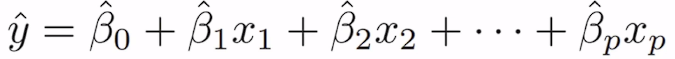

2. Находим все бетта или RSS(нужно минимизировать сумму квадратов ошибок(остатоков))
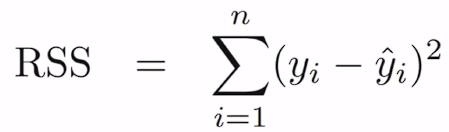

3. Получается следующее после подставки линейной формулы
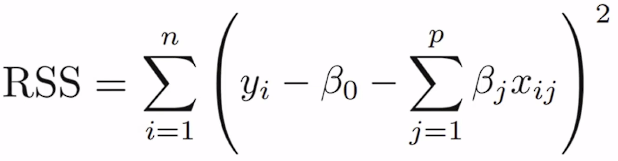

4. Добавляем штраф(penalty):
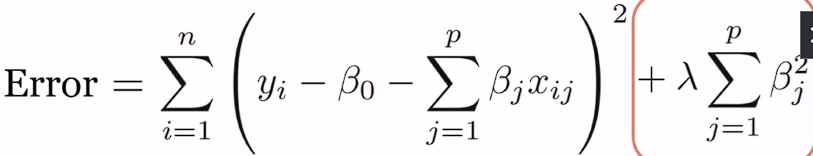

в sklearn лямбда называется alpha

пример: (x- признак, y - целевая переменная)

1. Разбиваем на обучающий и тестовый набор (розовые обучающие)

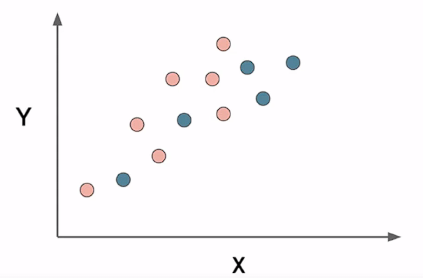

2. ищем линию (y-) = b(1)x + b(0)

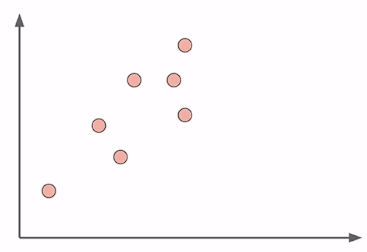

3. уменьшаем квадраты(то есть делаем модель не много переобученной). подбираем модель

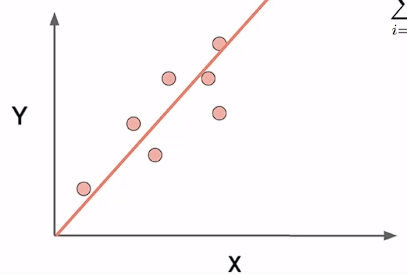

4. хочется модель сделать чуть-ниже

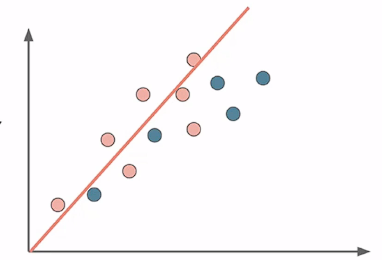

5. можем ли мы добавить не много смещения(bias) чтобы заметно уменьшить дисперсию(variance)?
- именно эту задачу решает ridge-регрессия

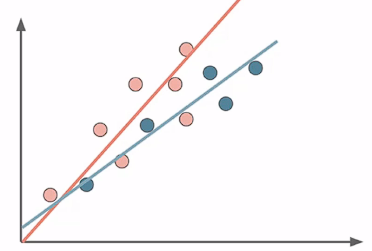

то есть альфа на это влияет. 
- если увеличиваем x увлеичивается и y 
- если добавляем слогаемое штрафа(то оно приведет к уменьшению линии)
- для новой линии если увеличивать х то y уже не так сильно увеличивается
- в итоге надеемся что на новых данных y не будет сильно увеличиваться
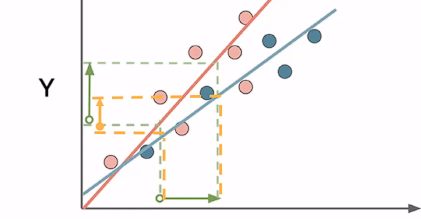

альфа может изменяться от 0 до +оо
мы просто предоставляем значения для перебора, компьютер сам выберет оптимальное значение

### Код

- лямбда называется alpha(и так почти для всех методов)
- Для метрик кросс-валидации Sklearn использует обьект scorer
- Все обьекты scorer следуют такому принципу, что большие результирующие значения лучше, чем меньшие
- Более высокая точность лучше кроме RMSE(хуже), для нее scorer использует отрицательные значения метрики
- Это позволяет получить универсальный подход для разных метрик. Это же относится и к параметру alpha.


In [10]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train,y_train)
test_predictions = ridge_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MAE

0.5774404204714166

In [11]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))
RMSE

0.8946386461319648

На сколько значения alpha = 10 являются наилучшим?
- Нужно сравнить с другими значениями alpha  с помощью кросс валидации


In [12]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=[0.001, 1, 10],scoring='neg_mean_absolute_error').fit(X_train,y_train)

In [13]:
# узнаем какой alpha является наилучшим
ridge_cv_model.alpha_
# просмотр различных метрик
from sklearn.metrics import _scorer

In [14]:
test_predictions = ridge_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MAE

0.4124212414557673

In [15]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))
RMSE

0.5805475444472642

### L1 Лассо-регрессия(least absolute shrinkage and selection operator)

- ограничивает размер коэффициентов
- может приводить к разреженным моделям, в которых некоторые коэффициенты становятся нулевыми
- в lasso_cv мы указаываем не значение альфа, а диапазон
- можно указать eps: число. он будет брать промежуток от 0 до указанного числа и сам выберет лучший вар.
    - чем меньше число мы укажем, тем больший диапазон мы будем обрабатывать

In [20]:
from sklearn.linear_model import LassoCV
# тут либо увеличиваем значение eps либо увеличиваем кол-во итераций если выскочит предупреждение
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv = 5,max_iter=1000000)
lasso_cv_model.fit(X_train,y_train)
lasso_cv_model.alpha_

0.004943070909225831

In [21]:
test_predictions = lasso_cv_model.predict(X_test)

In [22]:
MAE = mean_absolute_error(y_test,test_predictions)
MAE

0.4335034618590074

In [23]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))
RMSE

0.6063140748984036

In [24]:
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

- Лассо модель на порядок легче интерпретировать
- пригодится в задачах где требуется усилия чтобы измерить признаки для новых данных
- меньше коэффициентов по сравнению с моделью ridge

> Lasso: выпуклый обьект, располагающийся по касательной относительно границы, скорее всего пройдет через угол гиперкуба, в котором некоторые компоненты бетта в точности равны нулю. 

> Ridge: в случае n-сферы, точки границы, где некоторые компоненты бетта равны нулю, не отличаются от других точек, которых может коснуться выпуклый обьект. Вероятность коснуться таких точек не выше, чем для любых других точек, где все компоненты бетта не равны нулю

### Elastic Net L1 + L2

- лассо регресия позволяет уменьшить коэффициенты с точностью до нуля
    - если мы будем применять метод градиентного спуска то соприкоснемся с регрессиями

    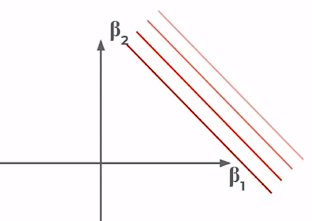

- в случае только двух признаков: (y-) = b(1)x(1) + b(2)x(2)
    - штраф lasso-регрессии: [b1] + [b2] <= s
    - точка соприкосновения не равна нулю

    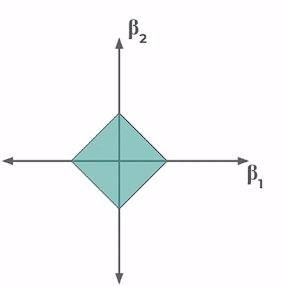
    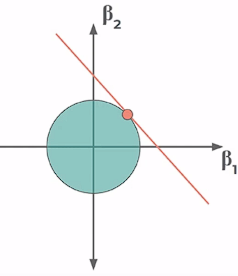

    - штраф ridge-регрессии: b(1)^2 + b(2)^2 <= s
    - точка соприкосновения либо одна либо две равны нулю

    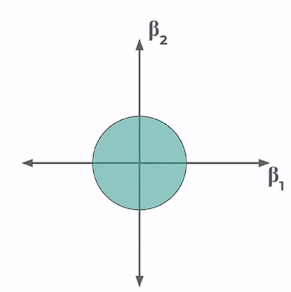
    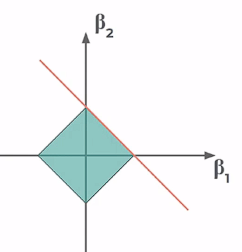

- если три признака то будет либо куб либо сфера

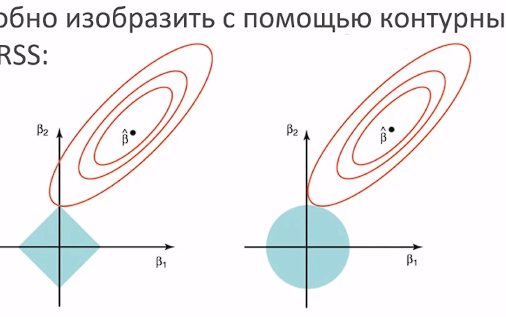

Elastic Net старается улучшить и L1 и L2 регуляризацию, обьединяя их вместе:

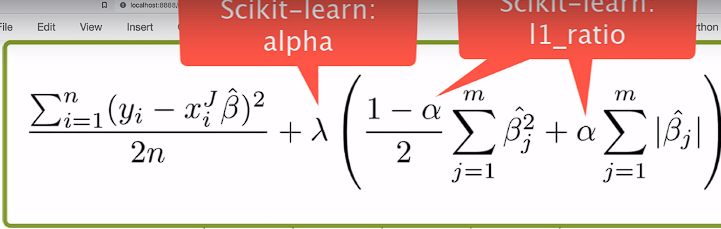

получаем нечто среднее между ромбом и кругом

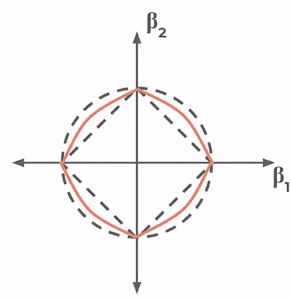

In [27]:
from sklearn.linear_model import ElasticNetCV
elactic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], 
                             eps=0.001,n_alphas=100, 
                             max_iter=1000000).fit(X_train,y_train)
elactic_model.l1_ratio_
# если 1 то превратилась в лассо модель


1.0

In [26]:
elactic_model.alpha_

0.004943070909225831

In [29]:
test_predictions = elactic_model.predict(X_test)

MAE = mean_absolute_error(y_test,test_predictions)
MAE

0.4335034618590074

In [31]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))
RMSE
# то же самое значение что в lasso

0.6063140748984036

# Feature Engineering - подготовка данных или конструирование признаков

Конструирование признаков - это процесс применения знаний о предметной области, чтобы из сырых данных извлечь полезные признаки, используя техники обработки данных

- Извлечение информации (extract): Этот подход заключается в том, чтобы извлекать ключевую информацию или признаки из исходных данных. Например, в анализе текста это может быть извлечение важных слов или фраз, а в компьютерном зрении - выделение объектов на изображении.

>Пример: Анализ текста отзывов о продукте. Вам нужно определить, какие слова или фразы наиболее часто встречаются в положительных и отрицательных отзывах. Вы извлекаете ключевые слова, такие как "качество", "удобство", "проблемы" и используете их для определения общей оценки продукта.

- Комбинирование информации (combine): Подход комбинирования информации предполагает объединение различных признаков или данных для создания новой информации или контекста. Это может включать в себя объединение множества признаков в один, создание агрегированных показателей или совмещение данных из разных источников.

> Пример: Анализ финансовых данных. Вы имеете данные о прибыли, затратах и выручке компании за разные кварталы. Вы можете комбинировать эти данные, чтобы вычислить показатели, такие как чистая прибыль или маржа прибыли, которые дают более полное представление о финансовом состоянии компании.

- Преобразование информации (transform): Здесь информация изменяется или преобразуется таким образом, чтобы она стала более удобной для анализа или обработки. Например, в машинном обучении это может быть стандартизация данных, нормализация или применение математических операций к признакам.

> Пример: Масштабирование признаков в машинном обучении. Если у вас есть данные с разными диапазонами значений (например, возраст от 0 до 100, а доход от 1000 до 100000), вы можете преобразовать их, чтобы они имели одинаковый масштаб. Например, вы можете применить стандартизацию, чтобы привести все признаки к среднему значению 0 и стандартному отклонению 1.


Кодировка числами(integer encoding):
- Плюсы:
- Легко сделать и понять
- Не увеличивает количество признаков
- Минусы:
- Добавляет упорядоченность между категориями

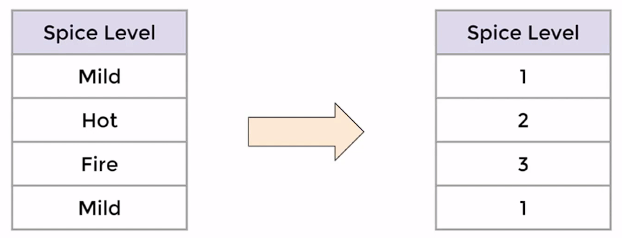

Если нет упорядоченности:
- Кодировка одного значения (one hot encoding): Для каждой категории создаем отдельный признак (dummy-переменную) со значением 0 или 1
- имеет смысл брать крупные категории, например регионы вместо отдельных стран
- в pandas для этих целей есть функции .map() и .apply()
- может понадобится время на выбор оптимального уровня категории.
- ловука 'dummy-переменных' или мульти-коллинеалрность.
    - конвертация в dummpy-переменные может приводить к дублированию признаков.
    
    дублирование с инверсией хотя лучше не указывать последнюю колонку(когда все определили)

    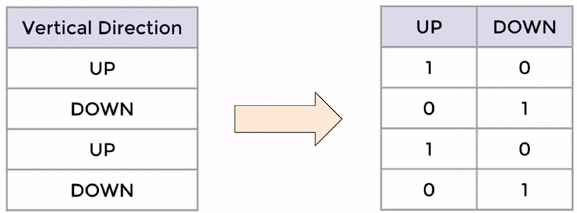
    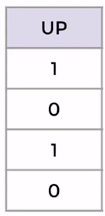
    
    в pandas есть drop_first, drop_last()

- cложнее добавлять новые категории(например добаление новых стран):
    - например добавить страну, которой не было
    - добавить все страны в виде признаков(что усложняет модель и не является оптимальной)

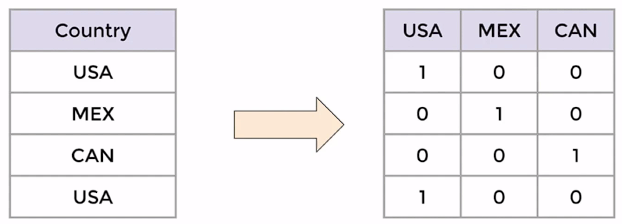
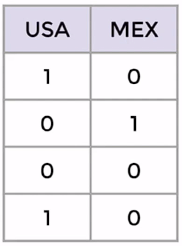

## Работа с выбросами(outliers)

- Часто в данных есть несколько точек, экстримально отличающиеся от всех других точек
- Зачастую лучше просто удалить эти точки из набора данных, чтобы получить более удачную модель

Какое значение считать выбросом(outlier)?
- Диапазоны и лимиты
    - Интерквартильный диапазон(ящик с усами)
    - Среднеквадратичное отклонение(более чем 3 ср.кв.отклонения)
    - Визуализация или знания о природе признака(диапазон точек и смотрим на выбросы)
- Процент строк данных(содержат экстремальные значения)
    - Если большой процент строк выглядит как выбросы, то это просто широкий диапазон возможных значений признака(в идеале меньше 1%)
    - Процент выбросов не должен превышать максимум нескольких процентов
- И то, и другое очень зависит от конкретной ситуации
    - полезно визуализировать данные
    - говорим что модель не подходит для значений выбросов



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#указываем среднее значение, среднеквадратическое отклонение и количество сэмплов
def create_ages(mu = 50, sigma = 13, num_samples=100,seed=42):
    np.random.seed(seed)
    
    
    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [3]:
sample = create_ages()

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


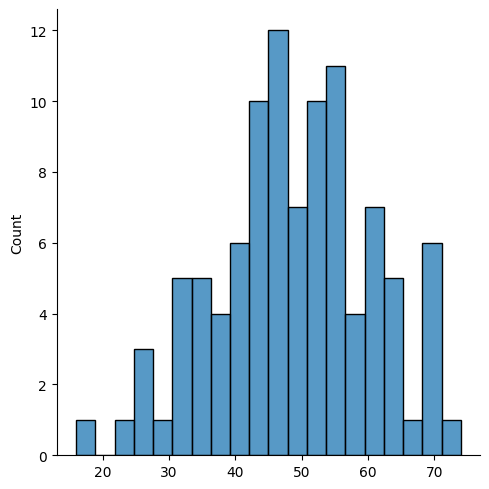

In [9]:
sns.displot(data=sample, bins = 20)

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

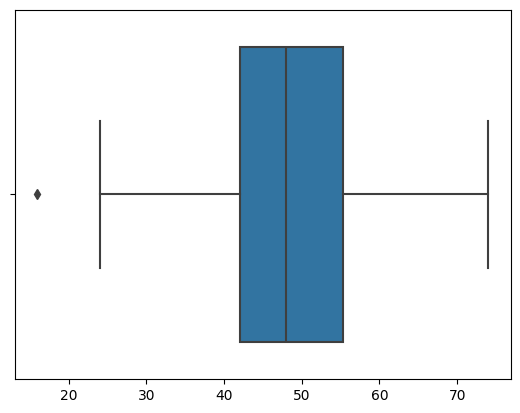

In [10]:
sns.boxplot(x = sample)

In [13]:
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [14]:
IQR = 55.25000 - 42.00000
lower_limit = 42 -1.5*IQR
ser[ser > lower_limit]
#исключили выброс

In [21]:
# или так проще
q75,q25 = np.percentile(sample,[75,25] )
iqr = q75-q25
q25 - 1.5*iqr

22.125

In [22]:
df = pd.read_csv('C:\\Users\\Administrator\\Desktop\\ml_udemy\\DATA\\Ames_Housing_Data.csv')

In [23]:
df.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  526301100           20        RL         141.0     31770   Pave   NaN   
1  526350040           20        RH          80.0     11622   Pave   NaN   
2  526351010           20        RL          81.0     14267   Pave   NaN   
3  526353030           20        RL          93.0     11160   Pave   NaN   
4  527105010           60        RL          74.0     13830   Pave   NaN   

  Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence Misc Feature  \
0       IR1          Lvl    AllPub  ...         0     NaN    NaN          NaN   
1       Reg          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   
2       IR1          Lvl    AllPub  ...         0     NaN    NaN         Gar2   
3       Reg          Lvl    AllPub  ...         0     NaN    NaN          NaN   
4       IR1          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
0        0       5    2010        WD           Normal     215000  
1        0       6    2010        WD           Normal     105000  
2    12500       6    2010        WD           Normal     172000  
3        0       4    2010        WD           Normal     244000  
4        0       3    2010        WD           Normal     189900  

[5 rows x 81 columns]

In [28]:
df = df.select_dtypes(exclude=['object'])
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


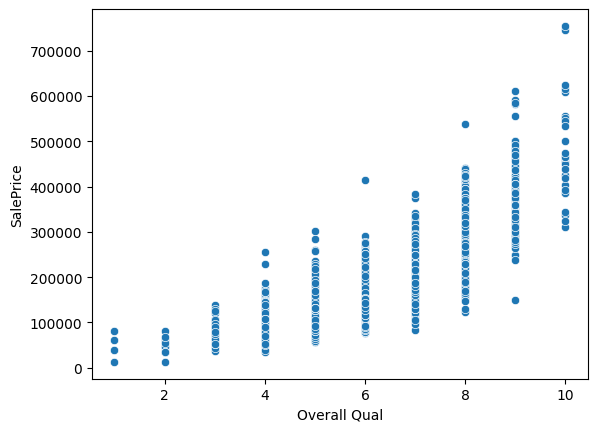

In [36]:
sns.scatterplot(x = 'Overall Qual', y = 'SalePrice', data = df);
# видим выбросы

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


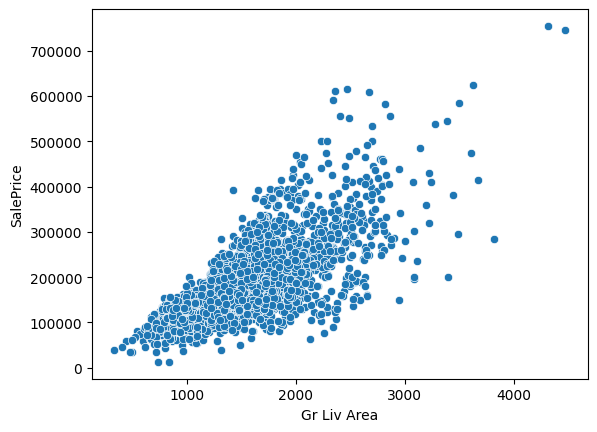

In [37]:
sns.scatterplot(data = df, x = 'Gr Liv Area', y= 'SalePrice');
# тут было 3 выброса с подозрительно низкой ценой

In [33]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
1182  533350090           60           NaN     24572             9   
1498  908154235           60         313.0     63887            10   
2180  908154195           20         128.0     39290            10   
2181  908154205           60         130.0     40094            10   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
1182             3        1977            1977        1050.0         410.0   
1498             5        2008            2008         796.0        5644.0   
2180             5        2008            2009        1224.0        4010.0   
2181             5        2007            2008         762.0        2260.0   

      ...  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1182  ...           140             70              16           0   
1498  ...           214            292               0           0   
2180  ...           546            484               0           0   
2181  ...           208            406               0           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice  
1182             0          0         0        6     2008     150000  
1498             0        480         0        1     2008     160000  
2180             0          0     17000       10     2007     183850  
2181             0          0         0       10     2007     184750  

[4 rows x 38 columns]

In [34]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 200000)]

PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
1498  908154235           60         313.0     63887            10   
2180  908154195           20         128.0     39290            10   
2181  908154205           60         130.0     40094            10   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
1498             5        2008            2008         796.0        5644.0   
2180             5        2008            2009        1224.0        4010.0   
2181             5        2007            2008         762.0        2260.0   

      ...  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1498  ...           214            292               0           0   
2180  ...           546            484               0           0   
2181  ...           208            406               0           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice  
1498             0        480         0        1     2008     160000  
2180             0          0     17000       10     2007     183850  
2181             0          0         0       10     2007     184750  

[3 rows x 38 columns]

In [35]:
df = df.drop(df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 200000)].index,axis=0)

In [39]:
df.to_csv('C:\\Users\\Administrator\\Desktop\\ml_udemy\\Ames_my_TT_outliers_remove.csv')

## Работа с missing data(отсутствующие данные)

### 1. Каких данных не хватает?

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
with open('C:\\Users\\Administrator\\Desktop\\ml_udemy\\DATA\\Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [49]:
df = pd.read_csv('C:\\Users\\Administrator\\Desktop\\ml_udemy\\DATA\\Ames_outliers_removed.csv')
df.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  526301100           20        RL         141.0     31770   Pave   NaN   
1  526350040           20        RH          80.0     11622   Pave   NaN   
2  526351010           20        RL          81.0     14267   Pave   NaN   
3  526353030           20        RL          93.0     11160   Pave   NaN   
4  527105010           60        RL          74.0     13830   Pave   NaN   

  Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence Misc Feature  \
0       IR1          Lvl    AllPub  ...         0     NaN    NaN          NaN   
1       Reg          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   
2       IR1          Lvl    AllPub  ...         0     NaN    NaN         Gar2   
3       Reg          Lvl    AllPub  ...         0     NaN    NaN          NaN   
4       IR1          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
0        0       5    2010        WD           Normal     215000  
1        0       6    2010        WD           Normal     105000  
2    12500       6    2010        WD           Normal     172000  
3        0       4    2010        WD           Normal     244000  
4        0       3    2010        WD           Normal     189900  

[5 rows x 81 columns]

In [50]:
df = df.drop('PID',axis = 1)

In [53]:
df.isnull().sum().sort_values()

MS SubClass          0
Sale Condition       0
Central Air          0
1st Flr SF           0
2nd Flr SF           0
                  ... 
Mas Vnr Type      1775
Fence             2355
Alley             2729
Misc Feature      2822
Pool QC           2915
Length: 80, dtype: int64

In [54]:
def percent_missing(my_df):
    result = 100 * my_df.isnull().sum() / len(my_df)
    result = result[result > 0].sort_values()
    return result

In [56]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

(0.0, 1.0)

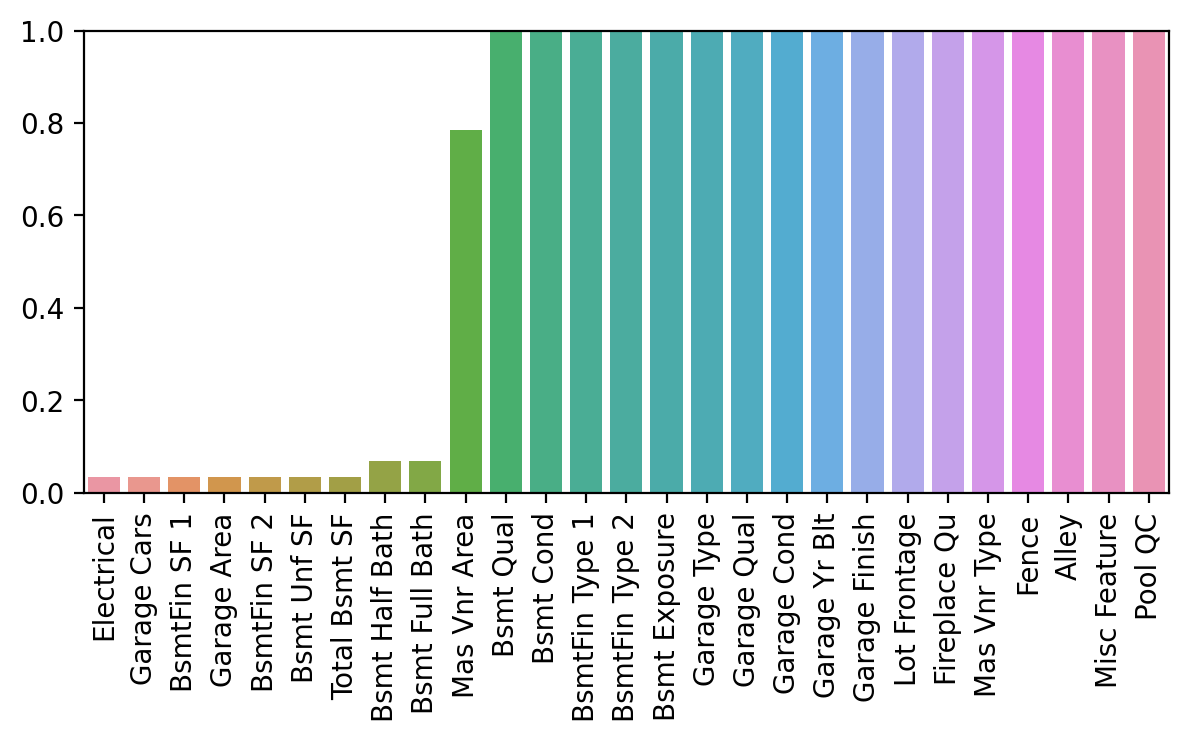

In [69]:
plt.figure(figsize=(7,3),dpi=200)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);
plt.ylim(0,1)

# тут мы узнали в каких колонках отсутсвует больше всего данных

In [70]:
100/ len(df)
# смотрим процентное соотношение одной строки

0.0341646737273659

In [74]:
df[df['Electrical'].isnull()]['Garage Area']
# смотрим не является ли пустое значение колонки, как и в другой, 
# то есть одна строка с двумя пустыми колонками(нет)

1576    400.0
Name: Garage Area, dtype: float64

In [77]:
df[df['Bsmt Half Bath'].isnull()]
#удаляем строки(не критично две строки из 3х тысяч)

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
1341           20        RM          99.0      5940   Pave   NaN       IR1   
1497           20        RL         123.0     47007   Pave   NaN       IR1   

     Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
1341          Lvl    AllPub        FR3  ...         0     NaN  MnPrv   
1497          Lvl    AllPub     Inside  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
1341          NaN        0       4     2008      ConLD         Abnorml   
1497          NaN        0       7     2008        WD           Normal   

      SalePrice  
1341      79000  
1497     284700  

[2 rows x 80 columns]

In [78]:
df =  df.dropna(axis=0, subset=['Electrical','Garage Area'])
percent_nan = percent_missing(df)

In [79]:
percent_nan

Bsmt Unf SF        0.034188
Total Bsmt SF      0.034188
BsmtFin SF 2       0.034188
BsmtFin SF 1       0.034188
Bsmt Full Bath     0.068376
Bsmt Half Bath     0.068376
Mas Vnr Area       0.786325
Bsmt Qual          2.735043
Bsmt Cond          2.735043
BsmtFin Type 1     2.735043
BsmtFin Type 2     2.769231
Bsmt Exposure      2.837607
Garage Type        5.367521
Garage Yr Blt      5.401709
Garage Qual        5.401709
Garage Finish      5.401709
Garage Cond        5.401709
Lot Frontage      16.752137
Fireplace Qu      48.547009
Mas Vnr Type      60.615385
Fence             80.478632
Alley             93.230769
Misc Feature      96.410256
Pool QC           99.589744
dtype: float64

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

(0.0, 1.0)

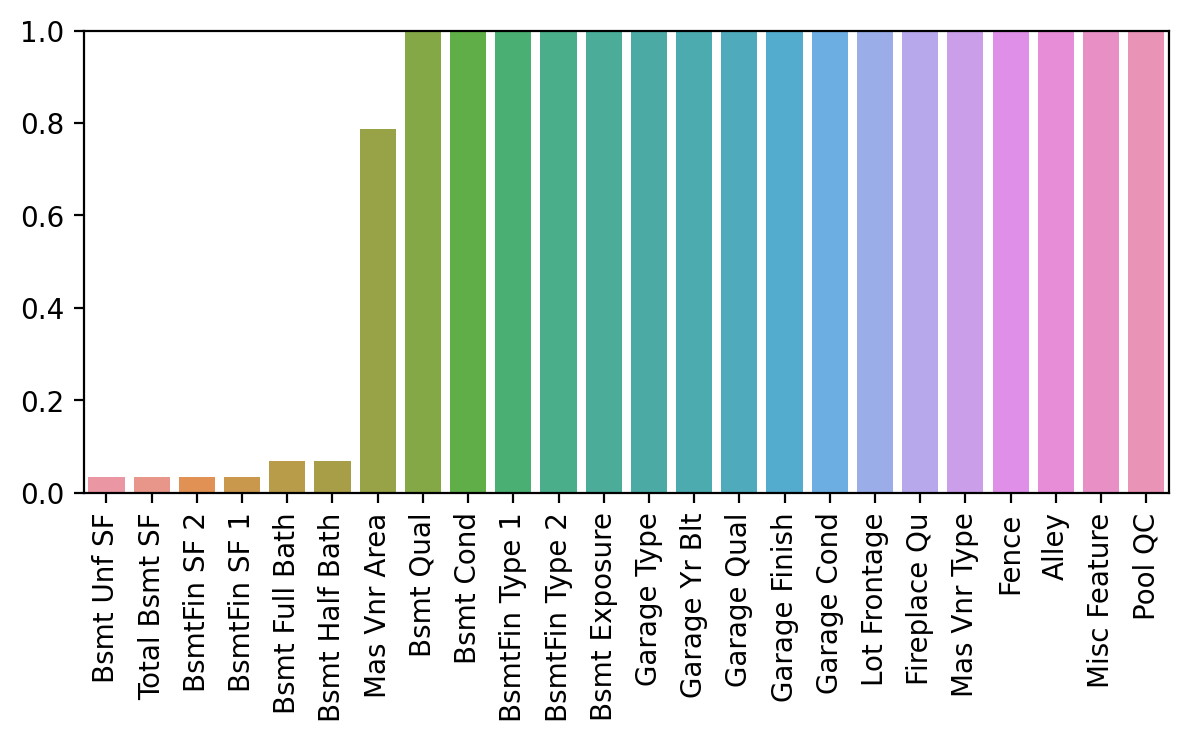

In [80]:
plt.figure(figsize=(7,3),dpi=200)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);
plt.ylim(0,1)

In [82]:
# видим что нет подвалов. заменяем значения на нули
df[df['Bsmt Full Bath'].isnull()]
# нулевые значения встречаются так же и в других колонках bsmt

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
1341           20        RM          99.0      5940   Pave   NaN       IR1   
1497           20        RL         123.0     47007   Pave   NaN       IR1   

     Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
1341          Lvl    AllPub        FR3  ...         0     NaN  MnPrv   
1497          Lvl    AllPub     Inside  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
1341          NaN        0       4     2008      ConLD         Abnorml   
1497          NaN        0       7     2008        WD           Normal   

      SalePrice  
1341      79000  
1497     284700  

[2 rows x 80 columns]

In [83]:
# для числовых колонок = fillna 0
bsmt_num_cols = ['BsmtFin SF 1', 
                 'BsmtFin SF 2', 
                 'Bsmt Unf SF',
                 'Total Bsmt SF', 
                 'Bsmt Full Bath', 
                 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
# для текстовых колонок
bsmt_str_cols =  ['Bsmt Qual', 
                  'Bsmt Cond', 
                  'Bsmt Exposure', 
                  'BsmtFin Type 1', 
                  'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8916\1729058959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8916\1729058959.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')


In [84]:
df[df['Bsmt Half Bath'].isnull()]
#проверяем что заменили

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

[0 rows x 80 columns]

In [107]:
percent_nan = percent_missing(df)
percent_nan

Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

(0.0, 10.0)

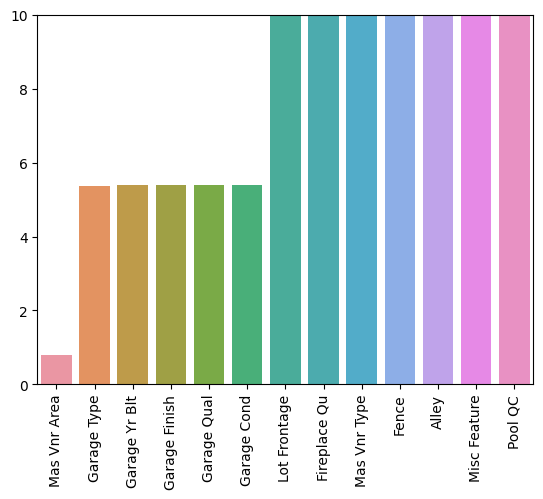

In [89]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
# довольны результатом, заменили
plt.ylim(0,10)

In [90]:
# была ошибка в документации там бесцветный называется none а в таблице указали Null, исправляем:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8916\2649919093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8916\2649919093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)


In [103]:
df[df['Mas Vnr Area'].isnull()]

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

[0 rows x 80 columns]

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

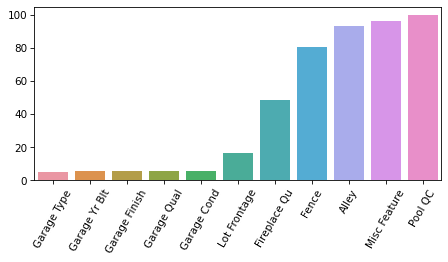

In [111]:
plt.figure(figsize=(7,3),dpi=75)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=60);
# довольны результатом, заменили

### Работа с отсутсвующими данными 3

теперь будем работать с данными у которых процент отсутсвующих данных больше 1
два подхода:
- заполнить колонки некоторыми значениями
    - потенциально меняем истинность исходных данных
    - выбираем способ заполнения(тут логика может быть не верна)
        - заменяем nan на ноль
        - статистическоие методы(среднее)
    - нужно будет применять трансформации для всех будущих данных
- удалить такие колонки
    - очень просто сделать
    - не нужно больше беспокоиться об этих признаках
    - можем потерять важные данные
    - удалять имеет смысл если много строк с NaN

In [116]:

df[['Garage Type', 
    'Garage Finish', 
    'Garage Qual', 
    'Garage Cond']] = df[['Garage Type', 
                          'Garage Finish', 
                          'Garage Qual', 
                          'Garage Cond']].fillna('None')
percent_nan = percent_missing(df)


C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

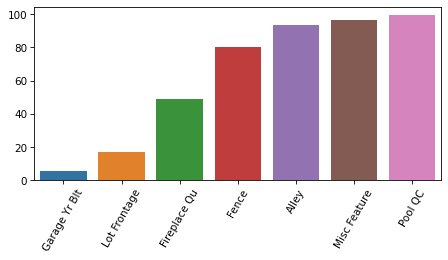

In [117]:
plt.figure(figsize=(7,3),dpi=75)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=60);
# довольны результатом, заменили

In [118]:
# осталась 1 колонка с датой постройки гаража, укажем ноль
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

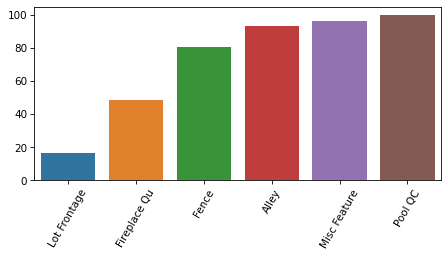

In [119]:
percent_nan = percent_missing(df)
plt.figure(figsize=(7,3),dpi=75)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=60);
# довольны результатом, заменили

In [120]:
# удаляем колонки с наибольшем количеством значений с nan
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

<Axes: >

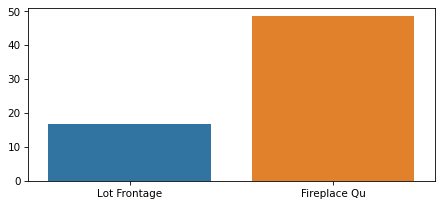

In [123]:
percent_nan = percent_missing(df)
plt.figure(figsize=(7,3),dpi=75)
sns.barplot(x=percent_nan.index,y=percent_nan)
# довольны результатом, заменили

In [127]:
df['Fireplace Qu'].head(5)

0      Gd
1    None
2    None
3      TA
4      TA
Name: Fireplace Qu, dtype: object

In [126]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

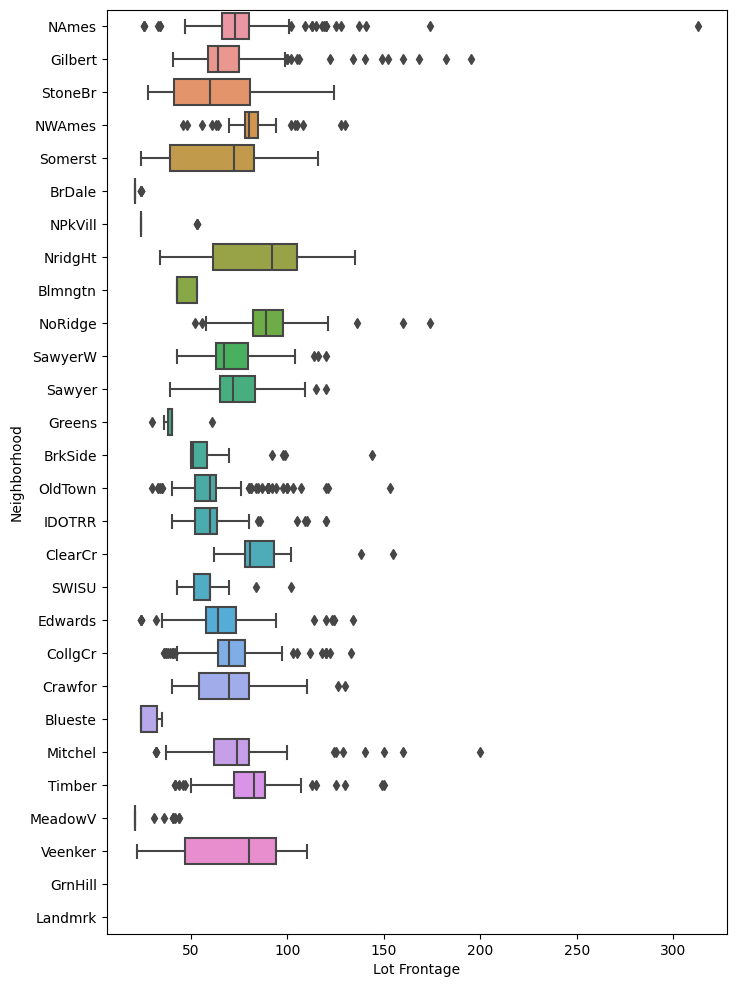

In [128]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [134]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [135]:
df['Lot Frontage'] = (df.groupby('Neighborhood')['Lot Frontage'].
                      transform(lambda value: value.fillna(value.mean())))

In [137]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [139]:
df['Lot Frontage'].isnull().sum()
# в итоге мы избавились от всех нулевых значений. применяя удаление, присвание значений 
# таких как ноль или среднее значение для строк None и эти данные готовы для анализа


0

## Работа с категориальными данными

In [142]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

1. чтобы преобразовать данные в dummy переменные нужно сначала выбрать колонки:
- df.info() - вручную
- df.select_dtypes(include='object') - автоматически
2. чтобы преобразовать их:
- pd.get_dummies(columns=,drop_first=True)

In [149]:
# разбиваем данные на текстовые и цифровые
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [150]:
# превращаем их в дамми
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [151]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [152]:
final_df
# очень много колонок, нужно выбрать только те которые коррелириют

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0       141.000000     31770             6             5        1960   
1        80.000000     11622             5             6        1961   
2        81.000000     14267             6             6        1958   
3        93.000000     11160             7             5        1968   
4        74.000000     13830             5             5        1997   
...            ...       ...           ...           ...         ...   
2922     37.000000      7937             6             6        1984   
2923     75.144444      8885             5             5        1983   
2924     62.000000     10441             5             5        1992   
2925     77.000000     10010             5             5        1974   
2926     74.000000      9627             7             5        1993   

      Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
0               1960         112.0         639.0           0.0        441.0   
1               1961           0.0         468.0         144.0        270.0   
2               1958         108.0         923.0           0.0        406.0   
3               1968           0.0        1065.0           0.0       1045.0   
4               1998           0.0         791.0           0.0        137.0   
...              ...           ...           ...           ...          ...   
2922            1984           0.0         819.0           0.0        184.0   
2923            1983           0.0         301.0         324.0        239.0   
2924            1992           0.0         337.0           0.0        575.0   
2925            1975           0.0        1071.0         123.0        195.0   
2926            1994          94.0         758.0           0.0        238.0   

      ...  Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0     ...            False          False          False          False   
1     ...            False          False          False          False   
2     ...            False          False          False          False   
3     ...            False          False          False          False   
4     ...            False          False          False          False   
...   ...              ...            ...            ...            ...   
2922  ...            False          False          False          False   
2923  ...            False          False          False          False   
2924  ...            False          False          False          False   
2925  ...            False          False          False          False   
2926  ...            False          False          False          False   

      Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0              True                   False                  False   
1              True                   False                  False   
2              True                   False                  False   
3              True                   False                  False   
4              True                   False                  False   
...             ...                     ...                    ...   
2922           True                   False                  False   
2923           True                   False                  False   
2924           True                   False                  False   
2925           True                   False                  False   
2926           True                   False                  False   

      Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                     False                   True                   False  
1                     False                   True                   False  
2                     False                   True                   False  
3                     False                   True                   False  
4                     False                   True               

In [153]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

### лучше открыть файл 02-Dealing-with-Categorical-Data.ipynb и прочитать описание там для ясности

# Кросс Валидация(все в блокнотах)

# Логистическая регрессия

- Логистическая регрессия позволяет предсказывать значения категориальной переменной на основе исторических данных
- Целевая категориальная переменная может принимать два или более дискретных значений(классов)

Дискретизация: Можно взять непрерывную переменную и преобразовать ее в набор из нескольких диапазонов или бакетов: обратное преобразование невыполнимо

Пример: указать для картинки один из классов:

- Класс 0: цена дома | 0-100к вероятность 10%   | изображение автомобиля
- Класс 1: цена дома | 100-200к вероятность 85% | изображение улицы
- Класс 2: цена дома | > 200к вероятность 5%    | изображение моста

> возвращает вероятность

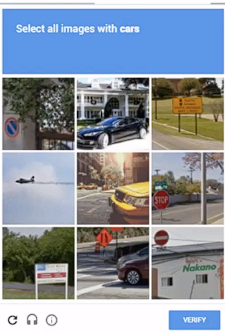

Для дискретных переменных мы не сможем посчитать метрики отклонения y - (y-)
- Нету изображение моста минус изображение улицы
- Нам нужно будет разработать другой набор метрик для оценки моделей

Логистическая регрессия получается преобразованием линейной регрессии в модель классификации с помощью логистической функции:

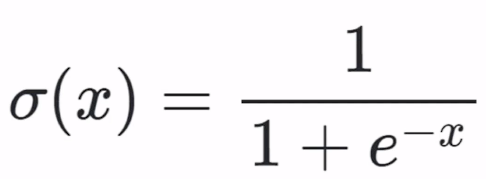

Как перевести модель **линейной регрессии** для задачи регрессии в **логистическую модель** для задача классификации: 
- Представим набор данных(x: доходы в прошлом году, y: невыполнение кредита)
- минусовые значения снял больше чем положил. 1 просрочек нет

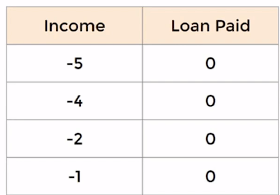

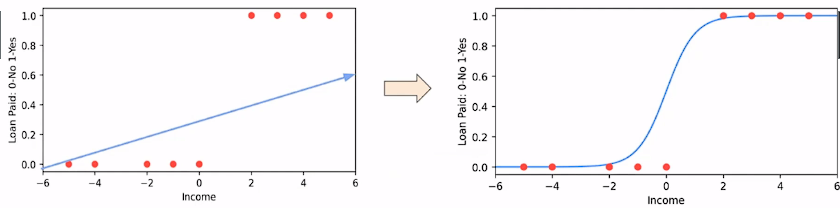

- P это своего рода поиск оптимального места для линии. все равно что искать линию ближающую к точкам
- если значение равно 1(желтая линия) то с вероятностью 90% он оплатил кредит. и мы ставим точка сверху(так как она выше 50%)


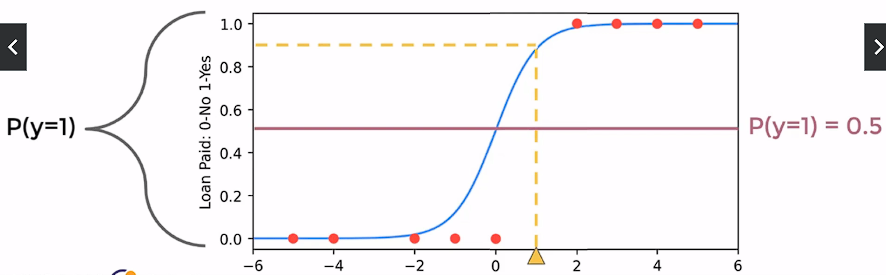

odds - шансы(коэффициенты) например 10 к 1
- Термин часто используется в букмекерских конторах - каковы шансы, что на скачках привет та или иная лошадь.
- p / (1 - p)

какую лучше выбрать? (метод максимального правдоподобия)

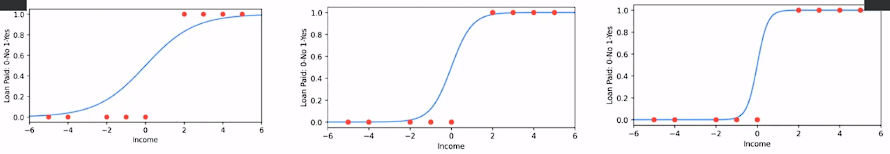



Подгоняем функцию (best fit)
- первый шаг метода максимального правдоподобия: перейти от log odds обратно к вероятностям

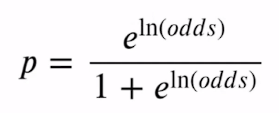

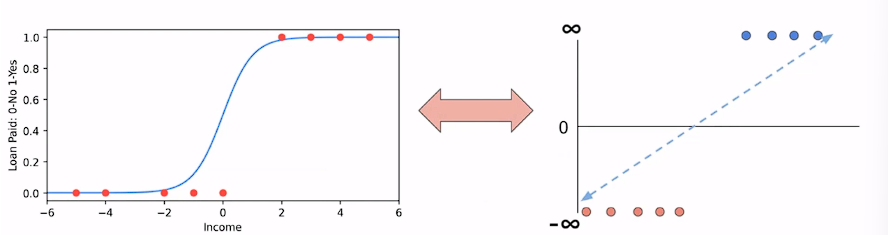

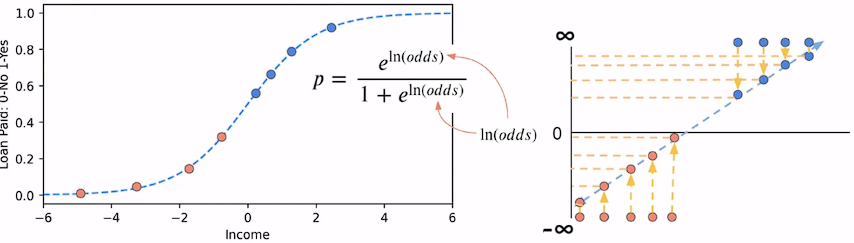

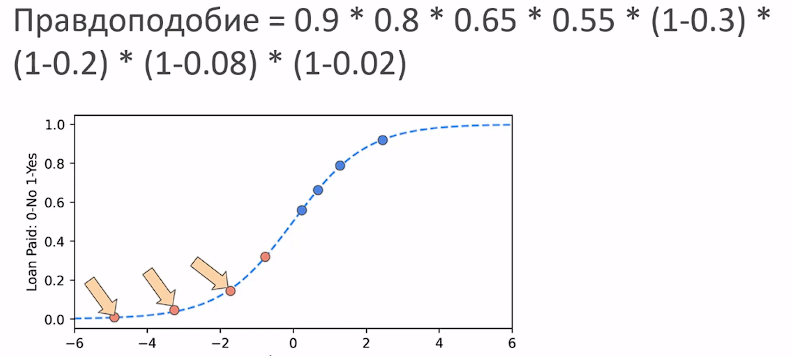

### Часть 1: Исследование данных

In [ ]:
# разделяем на целевую переменную и признаки
X = df.drop('test_result',axis=1)
y = df['test_result']

# нужно для разделения данных на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# создаем обьект скаляр для вычисления стандартного отклонения и средней
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# для обучающей выборки делаем сразу и маштабирование
scaled_X_train = scaler.fit_transform(X_train)

# только масштабирование для тестовой
scaled_X_test = scaler.transform(X_test)

# создаем модель логистической регрессии
from sklearn.linear_model import LogisticRegressionCV , LogisticRegression
log_model = LogisticRegressionCV()

# обучаем ее на выборках
log_model.fit(scaled_X_train,y_train)

# предсказываем целевые переменные
y_pred = log_model.predict(scaled_X_test)

# получаем список переменных из вероятностей пренадлежности к отдельльным классам
y_pred_proba = log_model.predict_proba(scaled_X_test)

# узнать коэффициенты модели
log_model.coef_

# вычисляем метрики
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# чтобы вычислить метрики нужно сравнить работу модели с истинными значениями на тестовом наборе данных
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

# чтобы визуализировать метрики(сам вычислить предсказание модели и выполнить визуализацию данных)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model,scaled_X_test,y_test) #normalazie='true' нормализация

# чтобы узнать метрики recall precision и f1-score
print(classification_report(y_test,y_pred))
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
fig,ax=plt.subplots(figsize=(3,2),dpi=200)
plot_roc_curve(log_model,scaled_X_test,y_train,ax=ax)
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

# либо по отдельности
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)

#лог регрессия
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_model = LogisticRegression(solver='saga', multi_class = 'ovr', max_iter = 5000)
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
c = np.logspace(0,10,20)
param_grid={'penalty':penalty,
            'l1_ratio':l1_ratio,
            'C':C}
grid_model = GridSearchCV(log_model, param_grid=param_grid)
grid_model.fit(scaled_X_test,y_train)
#solver: sag,saga - для больших данных
#solver: liblinear
#multi_class:ovr-сначала отделяет 1 класс от остального затем в остальном отделаяет остальные классы

# для KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)
# Количество соседей, используемых для классификации (целое число)
n_neighbors = 5
# Веса, присваиваемые соседям (строка: "uniform" или "distance")
weights = 'uniform'
# Метрика расстояния между точками (строка: "euclidean", "manhattan" и другие)
metric = 'minkowski'
# Степень для метрики Minkowski (целое число)
p = 2
# Алгоритм поиска ближайших соседей (строка: "auto", "ball_tree", "kd_tree", "brute")
algorithm = 'auto'
# Количество потоков для параллельного выполнения (целое число)
n_jobs = 1

from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)



### Метрики оценки модели классификации


Часть 1: матрица ошибок

Задача: Модель должна предсказывать наличие/ отсутсвие заболеваний на основе некоторых биологических признаков:
- 0 - заболевания нет  (тест отрицательный)
- 1 - заболевание есть (тест положительный)

---- но могут быть ошибки -----
- заболевший человек - тест отрицательный
- здоровый человек - тест положительный

confusion martrix (матрица ошибок)

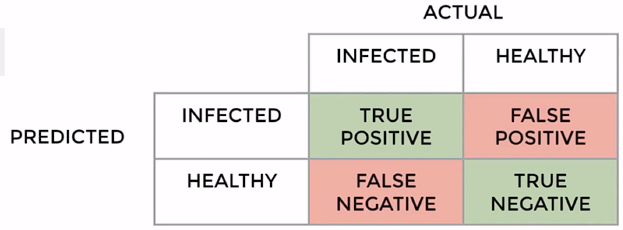

Accuracy - доля правильно классифицированных обьектов(как часто модель дает правильное предсказание?)
- Acc = (true p. + true n.) / total

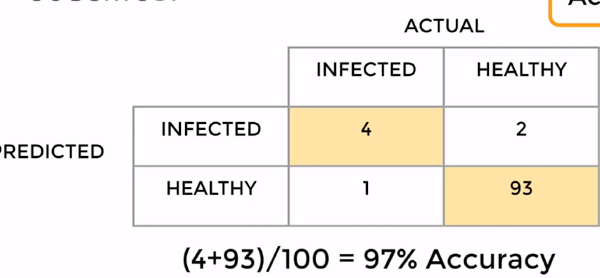

например модель возвращает всегда результат здоров, не смотря на то что в тесте есть infected. такая модель показывает 95% точности, но это не так

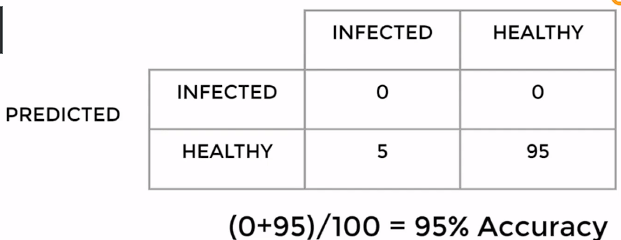

> В этом и состоит парадокс accuracy!(очень многие задачи описывает)
- Если классы несбалансированы, то любой классификатор столкнется с проблемой парадокса accuracy
- Несбалансированные классы всегда приводят к искажённым (завышенным) результатам
- Несбалансированные классы встречаются очень часто!
    - Заболевает небольшой процент населения
    - Фрод кредитных карт для небольшого процента карт

- Если один из двух классов имеет небольшой процент n%, то модель, предсказывающая "основной" класс, будет иметь accuracy (1-n)
- В Примере было только 5%
- Поэтому acc модели "все здоровы" была 95%

> Полагаться только на accuracy нельзя, понадобятся дургие метрики:
- Precision(точность)
- Recall(полнота) или sensitivity - чувствительность
- F1-score(F1-оценка или F1-мера) обьединение recall и precision

> **Метрика recall**
- Если человек действительно болеет, то как часто модель возвращает правильный результат?
- Из всех положительных случаев, какой процент этих случаев был обнаружен

True P. / Total Actual Positives

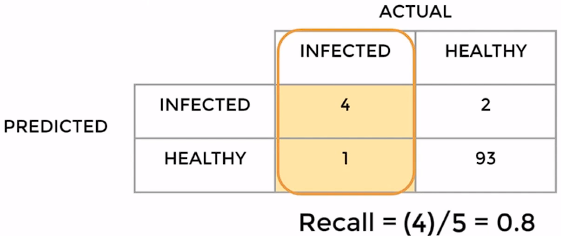


> Метрика Precision
- Когда наш тест предсказывает положительный результат, то как часто он предсказывает правильно?

True P/ Total Predicated Positives

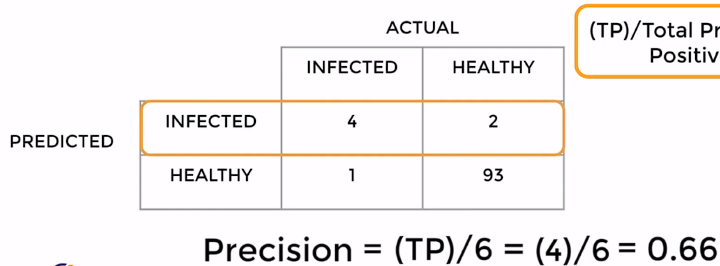

- Метрики Precision Recall помогают оценить работу модели именно для положительных случаев
- В зависимости от модели, очень часто между этими двумя метриками нужно искать некоторый баланс.

> **Метрика F1 score**
- Поскольку метрики Precision и Recall связаны между собой общим числителем (TP), мы можем также посчитать F1-score по следующей формуле гармонического среднего:

F = ( 2 * precision * recall ) / ( precision + recall )

Если одна из метрик равна нулю то вся результирующая метрика равна нулю

Существует целое множество метрик: все они вычисляются на матрице ошибок

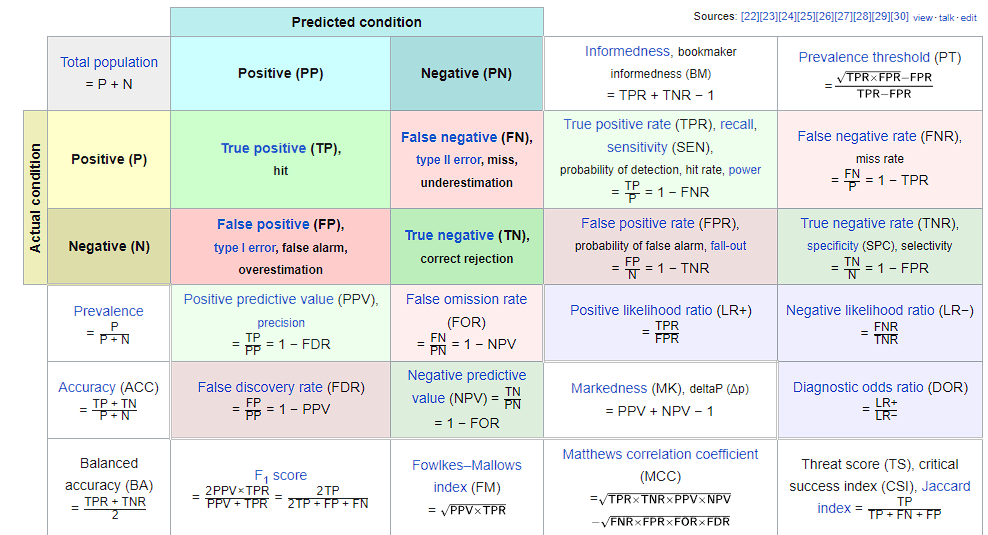

РОС-кривая(POC-Reciever Operator Characteristic) - рабочая характеристика приёмника

Зачастую при меньшем количестве данных эти граифик могут не выглядеть гладкими

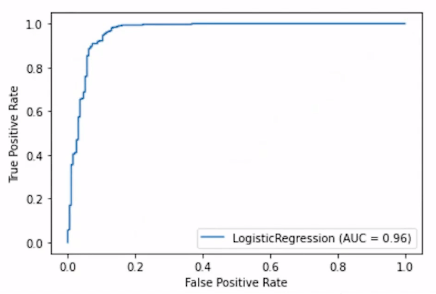

измерить площадь под графиком - AUC (Area Under the Curve) максимальное значение 1


Можно сравнивать с другими графиками например: precision vs recall

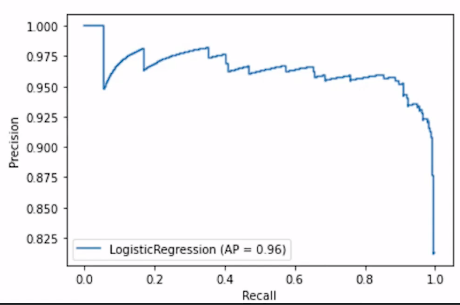

Логистическая регрессия много-классовые задачи: данные и модель

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#считаем по категориям
sns.countplot(df['species'])

# смотрим точки, делим на классы целевой переменной species
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')

# выводим различные графики (4x4) 
sns.pairplot(df,hue='species')

#смотрим корреляцию через тепловую карту
sns.heatmap(df.corr(),annot=True)


# Метод K-ближайших соседей (K nearest neighbors)

Knn - простейший алгоритм машинного обучения. Для каждой точки этот алгоритм присваивает значение, основываясь на расстоянии между старыми данными и новыми данными


хотим определить к какому классу относится точка

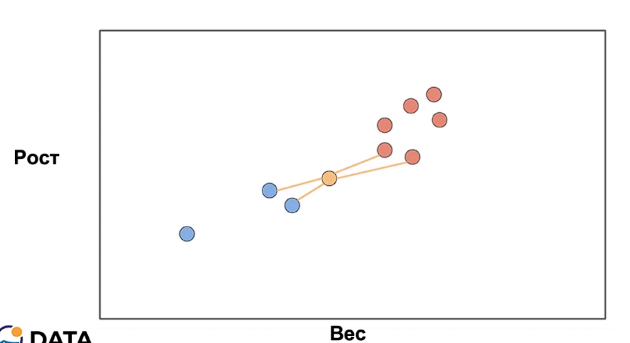

- Всегда выбирать нечетные значения K
- В случае равенства, уменьшить K на 1
- Случайно выбрать тот или иной вариант
- Выбрать ближайшую точку

Свойства в sklearn:
- Если точка имеет одинаковое расстояние до двух точек разного класса, то результат будет определять сортировка
    - будет выбран класс, идущий первым в множестве соседей.
    - Результаты отсортированы по расстоянию, так что будет выбран класс ближайщей точки.
    


Как выбрать число К?
- Хотим минимизировать error = 1 - accurary

Два метода:
- Метод локтя(elbow method) при увелечении к мы уменьшаем ошибку. достижение оптимальной к(10) мы видим что дальнейшее увелечение к приводит минимальным изменениям

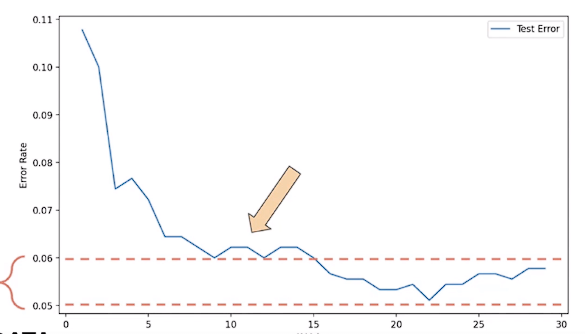

- Кросс-валидация - перебор различных значений K по сетке(grid search), чтобы найти значение K с наименьшими ошибками.
    - Это может привести к более сложной модели(более высокому значению K)
    - Учитывайте специфику задачи, чтобы понять насколько приемлемо увелечение значения K


Алгоритм KNN
- Выбираем значение К
- Сортируем вектора признаков (в N-мерном пространстве) по метрике расстояния
    - Расстояние Минковского
    - Евклидова метрика
    - Расстояние городских кварталов(Manhattan)
    - Расстояние Чебышёва
- Выбираем класс точек на основе К ближайших векторов признаков
    - Нужно выполнять масштабирование признаков

КNN для классификации: данные и модель(код)

- Обьект Pipeline в sklearn может включать в себя несколько шагов, таких как масштабирование (scaler) и работа с моделью
- Удобство в том, что мы можем вызывать эти шаги для разных данных единой командой


In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
# Получаем список ошибок для различных значений К
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates(test_error)

# Метод опорных векторов (support vector machines)

SVM - это более сложный алгоритм, чем KNN, но всё начинается с простого вопроса:
- **Можем ли мы провести гиперплоскость, которая хорошо отделит классы друг от друга?**

Гиперплоскость в n-мерном прострастренстве - это подпространство размерности n - 1:
- в 1 мерном это точка
- в 2 мерном это линия
- в 3 мерном это плоская поверхность

- Основная идея опорных векторов - в том, что мы можем найти гипеплоскость, отделяющую классы друг от друга. 
- Когда новые точки оказываются по ту или иную сторону этой гп, мы можем назначать этим точкам классы.

- Идея svm - найти разделяющую гп между классами
- новые точки получат разные классы по разные стороны гиперплоскости

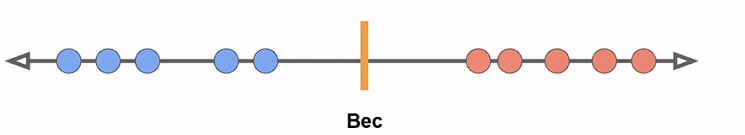

лучше выбрать такой разделитель, который максимизирует зазоры (margins) между классами.

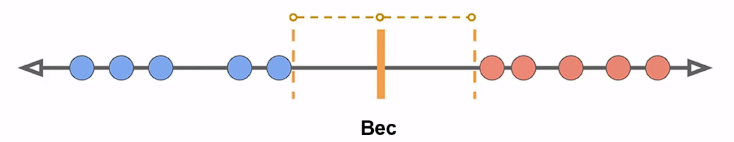 

метод maximal margin classifier

баланс при выборе разделяющей гп - bias-variance

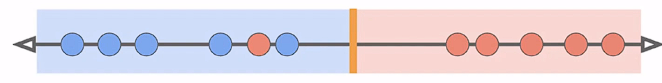

модель слишком сильно учитывает шум данных, когда отклоняется в одну из сторон:

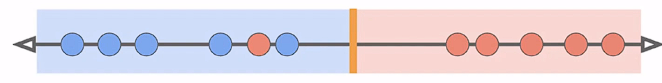

Мягкий зазор допусает неверные классы - soft margin

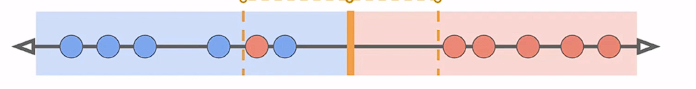


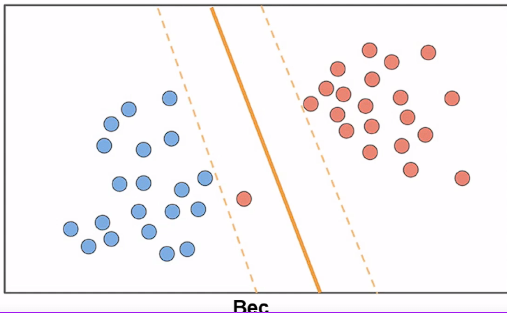

support vector classificate - классификатор опорных векторов

**Что если гиперплоскость показывает плохие результаты, даже если мы разрешаем неправильно определять классы?**

- Что не делай, тут не решишь с помощью опорных векторов задачу, для этого придумали ядра(kernels)
- C их помощью данные проецируются в пространство большей размерности, и уже в нем применяется гиперплоскость для разделения данных на классы.

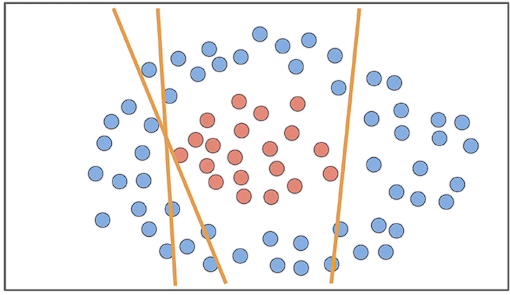

Ядра позволяет перейти от классификатора к полноценному методу опороных векторов:
- Существует множество разных ядер, с помощью которых можно спроецировать данные в пространство большей размерности.

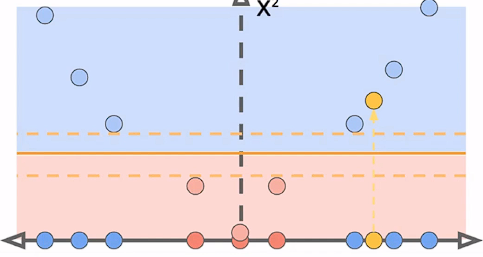

- Применения ядер в методе SVM называют kernel trick
- Мы переводим данные в пространство большей размерности.
- Математически, kernel trick позволяет не пересчитывать все точки в пространстве большей размерности.

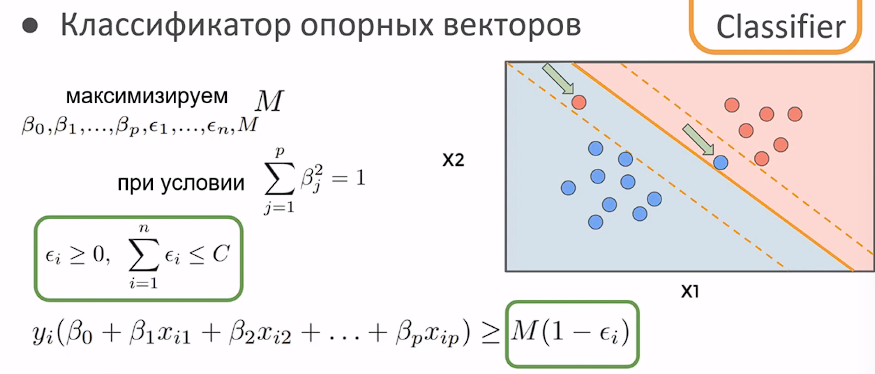

значение C указывает, что мы можем подобрать максимальное значением М- а это значит что расстояние от опорного вектора до границы первой лежащей точки класса

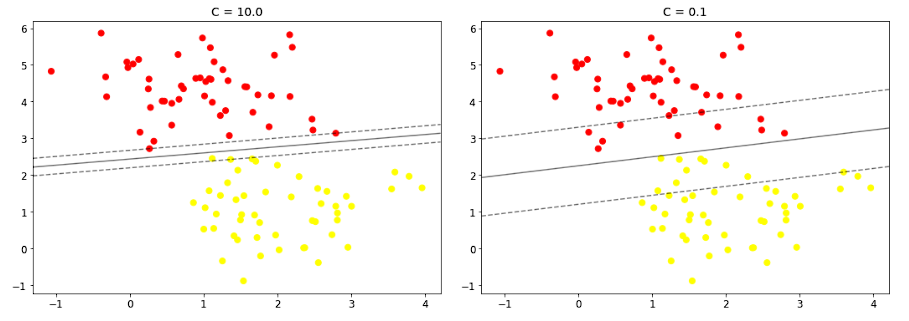

Оптимальное значение параметра 
 зависит от набора данных и должно быть подобрано с помощью перекрестной валидации или аналогичной процедуры.

- Как работать с пространством очень больших размерностей?
- При росте порядка полиномов растёт и вычислительная трудоёмкость для поиска зазоров.
- Эту сложность помогает решить 'kernel trick' который использует скалярное произведение векторов.(dot product)


--------------------------

Скалярное произведение векторов это сумма произведений этих векторов (dot product):
- a * b = (a1)(b1) + (a2)(b2)
- a * b = |a||b|cos(0)     0 - угол
    - cos(0) - 1
    - cos(90) - 0
    - cos(180) - 1

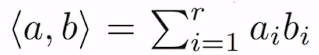

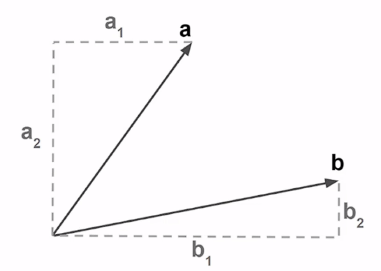
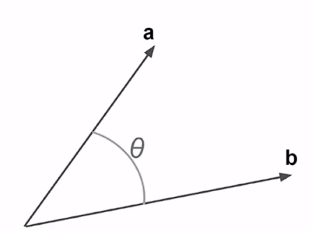

если мы переходим в пространство большей размерности, то мы просто добалвяем доп компоненты для всех доп измерений((a n),(b n))

---------------------------

желтые точки - опорные векора. и нам не надо знать все точки, только те, которые идут опорными (S)

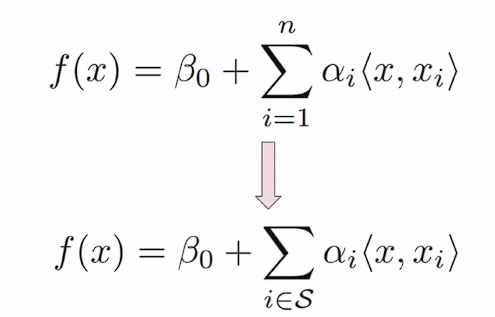

Ядро - функция, численно описывающая похожесть двух наблюдений

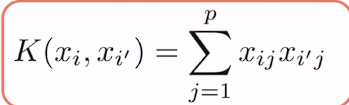

Радиальная базисная функция ядра:

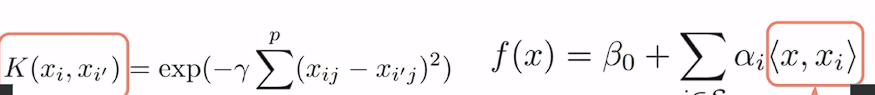